In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings
from collections import Counter
import seaborn as sns
from keras import Sequential
from keras.layers import Dense

warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
df = pd.read_csv('./bankloan.csv')
df = df.dropna()
df.isna().any()
df = df.drop('Loan_ID', axis=1)
df['LoanAmount'] = (df['LoanAmount'] * 1000).astype(int)
Counter(df['Loan_Status'])

Counter({'N': 148, 'Y': 332})

In [3]:
# Percentage of 'Y' & 'N' values on dataset
YPercentage = Counter(df['Loan_Status'])['Y'] / df['Loan_Status'].size * 100
print(f"Y: {YPercentage:.2f}%")
NPercentage = Counter(df['Loan_Status'])['N'] / df['Loan_Status'].size * 100
print(f"N: {NPercentage:.2f}%")

Y: 69.17%
N: 30.83%


In [4]:
pre_y = df['Loan_Status']
pre_x = df.drop('Loan_Status', axis=1)
dm_x = pd.get_dummies(pre_x)
dm_y = pre_y.map(dict(Y=1, N=0))

In [5]:
smote = SMOTE(sampling_strategy="minority")
x1, y = smote.fit_sample(dm_x, dm_y)
sc = MinMaxScaler()
X = sc.fit_transform(x1)

In [6]:
Counter(y)

Counter({0: 332, 1: 332})

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [8]:
classifier = Sequential()
classifier.add(Dense(400, activation='relu', kernel_initializer='random_normal', input_dim=X_test.shape[1]))
classifier.add(Dense(800, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(10, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [9]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
classifier.fit(X_train, y_train, batch_size=8, epochs=50, verbose=0)

In [11]:
eval_model = classifier.evaluate(X_train, y_train)
eval_model

531/531 [==============================] - 0s 120us/step


[0.2975864989048119, 0.8568738102912903]

In [12]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

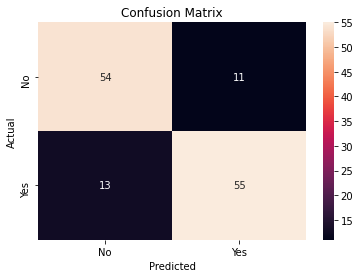

In [13]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)

# labels, title and ticks
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

In [14]:
import pickle
from sklearn.externals import joblib
filename = 'loan_model.pkl'
joblib.dump(classifier, filename)

['loan_model.pkl']

In [15]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
cvscores = []
for train, test in kfold.split(X, y):
    # create model
    model = Sequential()
    model.add(Dense(200, input_dim=17, activation='relu'))
    model.add(Dense(400, activation='relu'))
    model.add(Dense(4, activation='relu'))    
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
    # Fit the model
    model.fit(X[train], y[train], epochs=100, verbose=0)
    # evaluate the model
    scores = model.evaluate(X[test], y[test], verbose=0)
    print(f"{model.metrics_names[1]}, {scores[1]*100:.2f}%")
    cvscores.append(scores[1]*100)
print(f"{np.mean(cvscores):.2f}% (+/- {np.std(cvscores):.2f}%)")

accuracy, 80.18%
accuracy, 84.62%
accuracy, 77.38%
80.72% (+/- 2.98%)


In [16]:
# using the builded model
import pickle
from sklearn.externals import joblib
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [17]:
val = pd.DataFrame(y_pred, columns=['Status'])
# val = val.replace({True: 'Approved', False: 'Rejected'})
# valmdl = joblib.load('loan_model.pkl')

In [18]:
# sc = MinMaxScaler
# X = pd.read_csv("read_test_file.csv")
# X_test = sc.fit_transform(X)
# y_pred = mdl.predict(X_test)
# y_pred = (y_pred>0.5)

In [19]:
# val = pd.DataFrame(y_pred, columns=['Status'])
# val = val.replace({True: 'Approved', False: 'Rejected'})
# val